# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8 #80% of data is put in training, 20% in validation

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

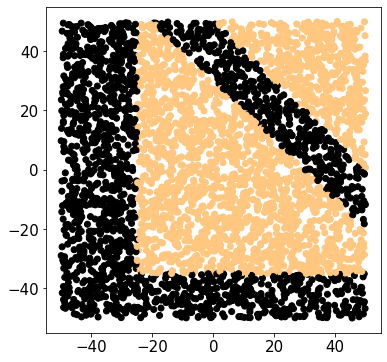

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N) #n of point for training 80%*3200
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50 #50 is the size of the box -> i rescale to a box [-1,1]

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [198]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=10

if CASE==1:
    model = Sequential() #initialize a model. sintax from keras
    model.add(Dense(L,input_shape=(L,),activation='relu')) #adds a layer, called Dense.The shape is the same of the data
    model.add(Dense(20,activation='relu')) #in the 2nd layer i want 20 nodes
    model.add(Dense(20,activation='relu'))
    model.add(Dense(9,activation='relu')) #starting point 20 nodes -> some irregularities. try w/ 5 -> solid lines. 
                                          #try w/ 10 nodes -> lots of irregularities. try w/ 7 -> as 5. Try w/8 -> as 5. 
                                          #try 9 -> as 5. => 9 is the key value
    #model.add(Dense(20,activation='relu')) #added a layer -> nothing changed
    model.add(Dropout(0.2)) #starting point 0.2 -> 2 bands remains. 0.01 second try -> bands remain. 
                             #Try w/ 9 nodes and 0.2. Same final picture. different valid-train graph. Try value 0.01, 0.5, 0.3
                             #0.25, 0.17. -> alla are apparently worse than 0.2
    model.add(Dense(1,activation='sigmoid')) #last layer. 1 for single node. all the layer collapese into only one and
                                             #the output is [0,1], cause of the sigmoid
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10: #better prediction but sbrodolato verso il basso
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu')) #change to relu -> better
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dropout(0.2)) #add dropout to see if it cuts off the borders -> it doesnt
    model.add(Dense(1,activation='relu')) #changed to relu -> same situation as CASE==1
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_139 (Dense)            (None, 6)                 18        
_________________________________________________________________
dense_140 (Dense)            (None, 2)                 14        
_________________________________________________________________
dropout_27 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [199]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop', #changed to rmsdrop after changing the nn parameters -> there's just an orange strip in the 
                                   #prediction panel. with CASE==10 the train-valid graphs are messed up
              #optimizer='adam',
              metrics=['accuracy'])

### Training

In [200]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.8952 - accuracy: 0.4825 - val_loss: 0.7293 - val_accuracy: 0.4837
Epoch 2/400
64/64 - 0s - loss: 0.7670 - accuracy: 0.5391 - val_loss: 0.6842 - val_accuracy: 0.4837
Epoch 3/400
64/64 - 0s - loss: 0.7338 - accuracy: 0.5141 - val_loss: 0.6734 - val_accuracy: 0.6475
Epoch 4/400
64/64 - 0s - loss: 0.7116 - accuracy: 0.5100 - val_loss: 0.6697 - val_accuracy: 0.6463
Epoch 5/400
64/64 - 0s - loss: 0.6993 - accuracy: 0.5278 - val_loss: 0.6651 - val_accuracy: 0.6562
Epoch 6/400
64/64 - 0s - loss: 0.6933 - accuracy: 0.5362 - val_loss: 0.6618 - val_accuracy: 0.6475
Epoch 7/400
64/64 - 0s - loss: 0.6824 - accuracy: 0.5953 - val_loss: 0.6576 - val_accuracy: 0.6450
Epoch 8/400
64/64 - 0s - loss: 0.6803 - accuracy: 0.6128 - val_loss: 0.6531 - val_accuracy: 0.6612
Epoch 9/400
64/64 - 0s - loss: 0.6725 - accuracy: 0.6319 - val_loss: 0.6488 - val_accuracy: 0.6675
Epoch 10/400
64/64 - 0s - loss: 0.6685 - accuracy: 0.6466 - val_loss: 0.6449 - val_accuracy: 0.6650
Epoch 11/

64/64 - 0s - loss: 0.5535 - accuracy: 0.6709 - val_loss: 0.5107 - val_accuracy: 0.8400
Epoch 84/400
64/64 - 0s - loss: 0.5705 - accuracy: 0.6572 - val_loss: 0.5094 - val_accuracy: 0.8400
Epoch 85/400
64/64 - 0s - loss: 0.5640 - accuracy: 0.6575 - val_loss: 0.5109 - val_accuracy: 0.8438
Epoch 86/400
64/64 - 0s - loss: 0.5552 - accuracy: 0.6675 - val_loss: 0.5091 - val_accuracy: 0.8413
Epoch 87/400
64/64 - 0s - loss: 0.5589 - accuracy: 0.6769 - val_loss: 0.5106 - val_accuracy: 0.8425
Epoch 88/400
64/64 - 0s - loss: 0.5555 - accuracy: 0.6681 - val_loss: 0.5112 - val_accuracy: 0.8338
Epoch 89/400
64/64 - 0s - loss: 0.5620 - accuracy: 0.6534 - val_loss: 0.5100 - val_accuracy: 0.8363
Epoch 90/400
64/64 - 0s - loss: 0.5504 - accuracy: 0.6722 - val_loss: 0.5083 - val_accuracy: 0.8388
Epoch 91/400
64/64 - 0s - loss: 0.5500 - accuracy: 0.6637 - val_loss: 0.5052 - val_accuracy: 0.8325
Epoch 92/400
64/64 - 0s - loss: 0.5410 - accuracy: 0.6784 - val_loss: 0.5042 - val_accuracy: 0.8388
Epoch 93/400


Epoch 165/400
64/64 - 0s - loss: 0.5262 - accuracy: 0.7038 - val_loss: 0.4767 - val_accuracy: 0.8338
Epoch 166/400
64/64 - 0s - loss: 0.5310 - accuracy: 0.7047 - val_loss: 0.4745 - val_accuracy: 0.8413
Epoch 167/400
64/64 - 0s - loss: 0.5358 - accuracy: 0.7038 - val_loss: 0.4754 - val_accuracy: 0.8388
Epoch 168/400
64/64 - 0s - loss: 0.5380 - accuracy: 0.7050 - val_loss: 0.4771 - val_accuracy: 0.8213
Epoch 169/400
64/64 - 0s - loss: 0.5235 - accuracy: 0.7222 - val_loss: 0.4720 - val_accuracy: 0.8438
Epoch 170/400
64/64 - 0s - loss: 0.5356 - accuracy: 0.7050 - val_loss: 0.4754 - val_accuracy: 0.8163
Epoch 171/400
64/64 - 0s - loss: 0.5313 - accuracy: 0.7091 - val_loss: 0.4736 - val_accuracy: 0.8275
Epoch 172/400
64/64 - 0s - loss: 0.5157 - accuracy: 0.7272 - val_loss: 0.4709 - val_accuracy: 0.8338
Epoch 173/400
64/64 - 0s - loss: 0.5283 - accuracy: 0.7119 - val_loss: 0.4688 - val_accuracy: 0.8350
Epoch 174/400
64/64 - 0s - loss: 0.5260 - accuracy: 0.7147 - val_loss: 0.4712 - val_accurac

64/64 - 0s - loss: 0.4580 - accuracy: 0.7359 - val_loss: 0.3943 - val_accuracy: 0.8575
Epoch 247/400
64/64 - 0s - loss: 0.4638 - accuracy: 0.7319 - val_loss: 0.3956 - val_accuracy: 0.8575
Epoch 248/400
64/64 - 0s - loss: 0.4680 - accuracy: 0.7259 - val_loss: 0.3967 - val_accuracy: 0.8562
Epoch 249/400
64/64 - 0s - loss: 0.4617 - accuracy: 0.7309 - val_loss: 0.3936 - val_accuracy: 0.8625
Epoch 250/400
64/64 - 0s - loss: 0.4585 - accuracy: 0.7403 - val_loss: 0.3946 - val_accuracy: 0.8625
Epoch 251/400
64/64 - 0s - loss: 0.4687 - accuracy: 0.7378 - val_loss: 0.3966 - val_accuracy: 0.8587
Epoch 252/400
64/64 - 0s - loss: 0.4624 - accuracy: 0.7381 - val_loss: 0.3974 - val_accuracy: 0.8587
Epoch 253/400
64/64 - 0s - loss: 0.4712 - accuracy: 0.7269 - val_loss: 0.3970 - val_accuracy: 0.8575
Epoch 254/400
64/64 - 0s - loss: 0.4582 - accuracy: 0.7372 - val_loss: 0.3967 - val_accuracy: 0.8587
Epoch 255/400
64/64 - 0s - loss: 0.4518 - accuracy: 0.7409 - val_loss: 0.3938 - val_accuracy: 0.8600
Epoc

Epoch 328/400
64/64 - 0s - loss: 0.4470 - accuracy: 0.7353 - val_loss: 0.3788 - val_accuracy: 0.8637
Epoch 329/400
64/64 - 0s - loss: 0.4449 - accuracy: 0.7350 - val_loss: 0.3792 - val_accuracy: 0.8625
Epoch 330/400
64/64 - 0s - loss: 0.4338 - accuracy: 0.7466 - val_loss: 0.3759 - val_accuracy: 0.8662
Epoch 331/400
64/64 - 0s - loss: 0.4398 - accuracy: 0.7397 - val_loss: 0.3766 - val_accuracy: 0.8687
Epoch 332/400
64/64 - 0s - loss: 0.4525 - accuracy: 0.7281 - val_loss: 0.3786 - val_accuracy: 0.8662
Epoch 333/400
64/64 - 0s - loss: 0.4387 - accuracy: 0.7394 - val_loss: 0.3795 - val_accuracy: 0.8612
Epoch 334/400
64/64 - 0s - loss: 0.4610 - accuracy: 0.7266 - val_loss: 0.3773 - val_accuracy: 0.8662
Epoch 335/400
64/64 - 0s - loss: 0.4612 - accuracy: 0.7337 - val_loss: 0.3847 - val_accuracy: 0.8637
Epoch 336/400
64/64 - 0s - loss: 0.4503 - accuracy: 0.7344 - val_loss: 0.3815 - val_accuracy: 0.8675
Epoch 337/400
64/64 - 0s - loss: 0.4530 - accuracy: 0.7316 - val_loss: 0.3811 - val_accurac

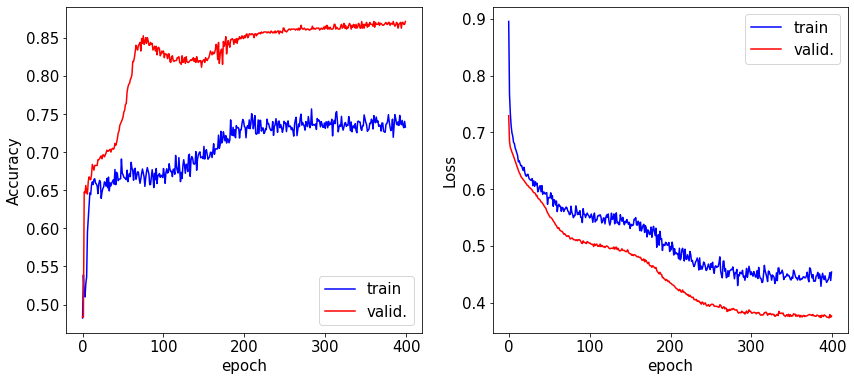

In [201]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [202]:
#the training is always larger than validation
#the spikes are due to adam o to the dataset?

In [203]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

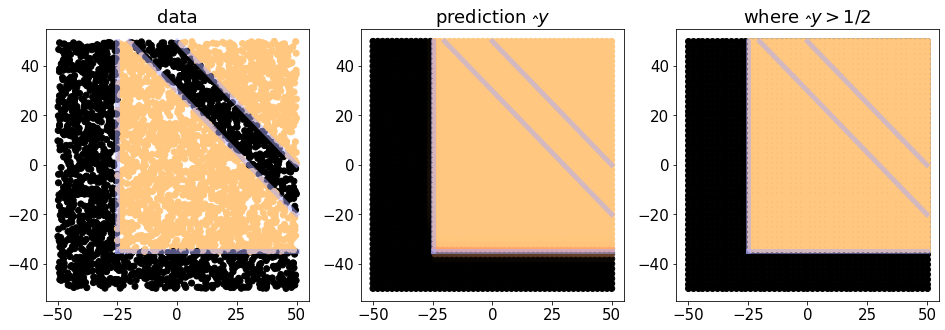

In [204]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show